# Precision-Recall and Receiver operating characteristics curves
Follow _Introduction to Machine Learning_ [Chapter 5](https://github.com/amueller/introduction_to_ml_with_python/blob/master/05-model-evaluation-and-improvement.ipynb)
- **Section 5.3.2 Metrics for Binary Classification**  - Precision-recall curves and ROC curves (p.295)
- **Section 5.3.2 Metrics for Binary Classification**  - Receiver operating characteristics (ROC) and AUC (p.299)

Precision-recall curve and area under the Precsion-Recall curve aka Average precision.   
Receiver operating characteristics curve (ROC) and area under the ROC curve aka ROC-AUC.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
"""
In a Precision-Recall (PR) curve, the threshold is a value that determines the classification boundary for a binary classifier. 
It's used to decide whether a data point belongs to the positive class or the negative class. 
The threshold is applied to the classifier's decision function or predicted probabilities to make predictions.

Here's how the threshold is defined in a Precision-Recall curve:

1. Threshold Range: The threshold typically ranges from the minimum score or probability
 output by the classifier to the maximum. For example, in a binary classification problem, 
 if a classifier assigns a probability of 0.7 to a data point, it means the classifier is predicting 
 the positive class if the threshold is set at or below 0.7.

2. Threshold Variation: To create a PR curve, you vary this threshold systematically.
You start with a threshold that allows almost all data points to be classified as positive 
(low threshold, high recall, low precision), and then gradually increase the threshold, 
which leads to fewer data points being classified as positive (higher precision, lower recall).

Precision and Recall Calculation: At each threshold, you calculate two values:

Precision: The ratio of true positives (correctly predicted positive cases) to the total number of positive predictions (true positives + false positives) at that threshold.
Recall: The ratio of true positives to the total number of actual positive cases (true positives + false negatives) at that threshold.
Plotting the Curve: These precision and recall values are then plotted on the PR curve, typically with precision on the y-axis and recall on the x-axis. Each point on the curve represents the precision and recall at a specific threshold.

Threshold Interpretation: 
You can interpret the PR curve by considering the trade-off between precision and recall 
at different threshold levels. A higher threshold leads to higher precision but lower recall, 
while a lower threshold leads to higher recall but lower precision.

The threshold is a critical parameter because it allows you to control the 
balance between precision and recall according to the specific requirements of your application. 
For example, in a medical diagnosis application, you might want to use a lower threshold to maximize recall 
(catching as many positive cases as possible) even if it means accepting a lower precision (more false positives). In fraud detection, you might prefer a higher threshold to maximize precision (minimizing false alarms) at the expense of some recall.





"""

In [5]:
import mglearn

In [6]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2],
                  random_state=22)
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

## 1. Precision-recall curve 
To investigate different thresholds and the effect on precision and recall, we can use a precision-recall curve.

Note that `precision_recall_curve()` takes actual target and predicted decision function (or probability) as arguments, because it will vary the decision threshold to create the curve.

In [7]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_val, svc.decision_function(X_val))

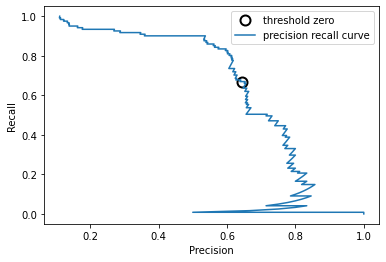

In [8]:
# Use more data points for a smoother curve
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
    y_val, svc.decision_function(X_val))
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

With the arrays produced above, use `np.argwhere()` to find threshold for a certain minimum recall:

In [6]:
desired_recall = 0.8
idx = np.argwhere(recall>=desired_recall)[-1]
idx

array([932])

In [7]:
thresholds[idx]

array([-0.44822521])

Using probabilities of the positive class to plot precision-recall curve:

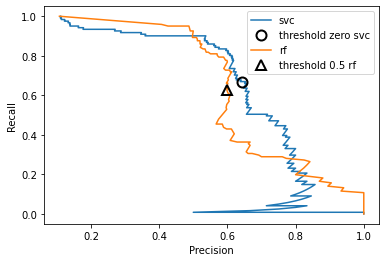

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_val, rf.predict_proba(X_val)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

Remember that f1-score combines precision and recall into a single metric. This is done for the default threshold.


In [9]:
from sklearn.metrics import f1_score
print("f1_score of random forest: {:.3f}".format(
    f1_score(y_val, rf.predict(X_val))))
print("f1_score of svc: {:.3f}".format(f1_score(y_val, svc.predict(X_val))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


## 2. Area under the Precision-Recall curve: Average precision
The precision-recall curve explores all thresholds and contains a lot of information. One summary score is the area under the curve, also called average precision

In [10]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_val, rf.predict_proba(X_val)[:, 1])
ap_svc = average_precision_score(y_val, svc.decision_function(X_val))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


## 3. Receiver operating characteristics (ROC) curve

An ROC curve plots FPR (x-axis) vs. TPR (y-axis).

**True positive rate (TPR):**  
$TPR (Recall) = \frac{TP}{TP+FN}$  
Same as Recall. Using the *positive class* row. How many actual positive samples do we catch? This would ideally be 1.


**False positive rate (FPR):**     
$FPR = \frac{FP}{FP+TN}$  
Using the *negative class* row. Fraction of falsy identified positives. This would ideally be 0.

In [11]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Use more data points for a smoother curve
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

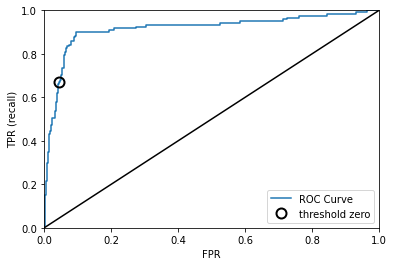

In [12]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, svc.decision_function(X_val))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot([0,1], [0,1], 'k')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc=4)

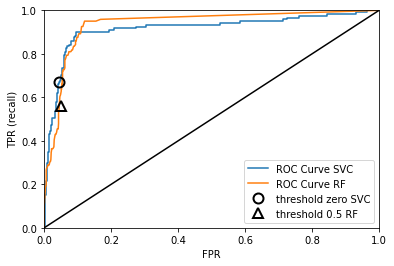

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_val, rf.predict_proba(X_val)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

plt.plot([0,1], [0,1], 'k')
plt.xlim(0,1)
plt.ylim(0,1)

plt.legend(loc=4)

## 4. ROC Area under the curve (AUC)

In [14]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_val, rf.predict_proba(X_val)[:, 1])
svc_auc = roc_auc_score(y_val, svc.decision_function(X_val))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


## 5. Analyzing a class imbalance example

In the nine, not-nine classifier, there is a class imbalance: 1/10 nine, 9/10 not-none. Hence, predicting not-nine all the time would give you an accuracy of 0.9.

gamma = 1.00  accuracy = 0.90  ROC-AUC = 0.50 PR-AUC = 0.10
gamma = 0.10  accuracy = 0.90  ROC-AUC = 0.96 PR-AUC = 0.79
gamma = 0.01  accuracy = 0.90  ROC-AUC = 1.00 PR-AUC = 1.00


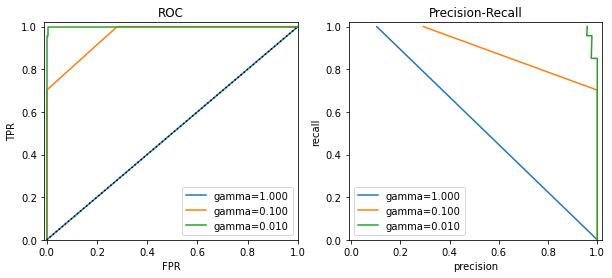

In [15]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_val, y_train, y_val = train_test_split(
    digits.data, y, random_state=0)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_val, y_val)
    auc = roc_auc_score(y_val, svc.decision_function(X_val))
    avg_prec = average_precision_score(y_val, svc.decision_function(X_val))
    
    print("gamma = {:.2f}  accuracy = {:.2f}  ROC-AUC = {:.2f} PR-AUC = {:.2f}".format(
          gamma, accuracy, auc, avg_prec))
    
    fpr, tpr, _ = roc_curve(y_val , svc.decision_function(X_val))
    axs[0].plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
    
    prec, rec, _ = precision_recall_curve(y_val , svc.decision_function(X_val))
    axs[1].plot(prec, rec, label="gamma={:.3f}".format(gamma))

    
axs[0].set_xlabel("FPR")
axs[0].set_ylabel("TPR")
axs[0].set_title("ROC")
axs[0].plot([0,1], [0,1], ':k')
axs[0].set_xlim(-0.01, 1)
axs[0].set_ylim(0, 1.02)
axs[0].legend(loc="best")

axs[1].set_xlabel("precision")
axs[1].set_ylabel("recall")
axs[1].set_title("Precision-Recall")
axs[1].set_xlim(-0.01, 1.02)
axs[1].set_ylim(0, 1.02)
axs[1].legend(loc="best")

It looks like gamma=1 exactly lies on the unit diagonal. It behaves like a random guess classifier.

>The accuracy of all three settings of gamma is the same, 90%. This might be the same as chance performance, or it might not. Looking at the AUC and the corresponding curve, however, we see a clear distinction between the three models. With gamma=1.0, the AUC is actually at chance level, meaning that the output of the decision_function is as good as random. With gamma=0.1, performance drastically improves to an AUC of 0.96. Finally, with gamma=0.01, we get a perfect AUC of 1.0. That means that all positive points are ranked higher than all negative points according to the decision function. In other words, with the right threshold, this model can classify the data perfectly!5 Knowing this, we can adjust the threshold on this model and obtain great predictions. If we had only used accuracy, we would never have discovered this.

>For this reason, we highly recommend using AUC when evaluating models on imbalanced data. Keep in mind that AUC does not make use of the default threshold, though, so adjusting the decision threshold might be necessary to obtain useful classification results from a model with a high AUC.

## 6. A random classifier 
The diagonal in ROC is a random classifier, let's see why.

Generate some random labels with class imbalance:

In [16]:
y_true = np.random.choice([0, 1], 100, p=[0.7, 0.3])
y_true

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [17]:
np.unique(y_true, return_counts=True)

(array([0, 1]), array([67, 33]))

Predict class label randomly with 50/50 chance:

In [18]:
y_predicted = np.random.choice([0, 1], 100, p=[0.5, 0.5])
y_predicted

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [19]:
np.unique(y_predicted, return_counts=True)

(array([0, 1]), array([46, 54]))

Calculate confusion matrix:

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_predicted)
tn, fp, fn, tp =cm.ravel()
cm

array([[32, 35],
       [14, 19]])

We see that in both rows, the predictions are split evenly. Hence, recall and false positive rate should be close to 0.5, and would lie on the diagonal. Let's check:

In [21]:
recall = tp / (tp+fn)
recall

0.5757575757575758

In [22]:
FPR = fp / (fp+tn)
FPR

0.5223880597014925

Inspired by [this](https://datascience.stackexchange.com/questions/31872/auc-roc-of-a-random-classifier) stackexchange, if we vary the prediction probability of the positive class, we obtain different points on the ROC curve. With that we can construct the diagonal plot we anticipate.

In [23]:
from sklearn.metrics import confusion_matrix

def create_random_model(y_true, n_thresholds=10, n_averages=100):
    """Create tpr (recall), fpr, prec variables for a random classifier
    
        A random model predicts:
        - negative class with probability (1-p)
        - postive class with probability p
        stored in y_pred
        
        y_true and y_pred are used to calculate the confusion matrix,
        and from that TPR and FPR and Precision.
        
        Repeated for different probabilities, aka simulated thresholds.
    
        y_true(np.array or list): Actual binary predictions using [0,1]
        n_thresholds(int): Number of thresholds to simulate
        n_averages(int): Number of repeats at each simulated threshold.
        
        returns list with TPRs, list with FPRs, list with Precs
    """
    tprs=[]
    fprs = []
    precs = []
    n_values = len(y_true)
    for p in np.linspace(0.1,0.9,n_thresholds):
        tpr=0
        fpr=0
        prec=0
        # to obtain smoother curves, we repeat the random model 
        # at each threshold and average.
        # an alternative would be to increase the length of y_true
        for i in range(n_averages):
            y_pred = np.random.choice([0, 1], n_values, p=[1-p, p])
            mat = confusion_matrix(y_true, y_pred) 
            tn, fp, fn, tp = mat.ravel()
            tpr += tp/(tp+fn)
            fpr += fp/(fp+tn)
            prec += tp / (tp+fp)
        tprs.append(tpr/n_averages)
        fprs.append(fpr/n_averages)
        precs.append(prec/n_averages)
        
    return tprs, fprs, precs
        
    

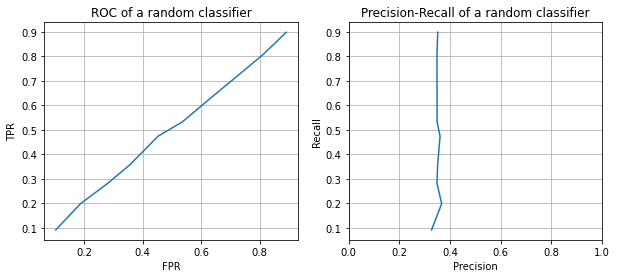

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

y_true = np.random.choice([0, 1], 100, p=[0.7, 0.3])
tprs, fprs, precs= create_random_model(y_true)

axs[0].plot(fprs, tprs)
axs[0].grid(True)
axs[0].set_xlabel('FPR')
axs[0].set_ylabel('TPR')
axs[0].set_title('ROC of a random classifier');

axs[1].plot(precs, tprs)
axs[1].set_xlim([0,1])
axs[1].grid(True)
axs[1].set_xlabel('Precision')
axs[1].set_ylabel('Recall')
axs[1].set_title('Precision-Recall of a random classifier');

While a random classifier is the diagonal in an ROC plot, a random classifier is a vertical line in the precision-recall plot. Precision is constant and equal to the probability of positive class (here 0.3). Recall is equal to the prediction probabilty of the random classifier, which is varied between 0.1 and 0.9 here.

See here for the math: https://stats.stackexchange.com/questions/89495/precision-and-recall-of-a-random-classifier